In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

## Import simulation run data


In [ ]:
os.getcwd()

In [ ]:
os.chdir('../../')
os.getcwd()

In [4]:
experiment_results = 'experiments/system_model_v3/recommended_params_mc/experiment_results.hdf5'
experiment_results_keys = []
with pd.HDFStore(experiment_results) as store:
    experiment_results_keys = list(filter(lambda x: "results" in x, store.keys()))
    exceptions_keys = list(filter(lambda x: "exceptions" in x, store.keys()))

In [5]:
# A list of all experiment result keys
experiment_results_keys

['/results_2021-09-14T10:35:11.472358', '/results_2021-09-14T11:00:37.949966']

In [6]:
# Copy a results_ key from the above keys to select the experiment
experiment_results_key = experiment_results_keys[-1]#'results_2021-02-09T18:46:33.073363' # Or select last result: experiment_results_keys[-1]
experiment_timestamp = experiment_results_key.strip('results_')
exceptions_key = 'exceptions_' + experiment_timestamp
experiment_timestamp

'/results_2021-09-14T11:00:37.949966'

In [7]:
df_raw = pd.read_hdf(experiment_results, experiment_results_key)
df_raw.tail()

,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,rai_borrower_state,rai_borrower_max_balance,rai_lender_state,rai_lender_max_balance,simulation,subset,run,substep,timestep,events
26272,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,31514400,2018-12-31 18:00:00,0,278.623425,0,0.0,...,0,0.0,0,0.0,0,0,3,18,8754,NaN
26273,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,31518000,2018-12-31 19:00:00,0,278.507186,0,0.0,...,0,0.0,0,0.0,0,0,3,18,8755,NaN
26274,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,31521600,2018-12-31 20:00:00,0,278.793335,0,0.0,...,0,0.0,0,0.0,0,0,3,18,8756,NaN
26275,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,31525200,2018-12-31 21:00:00,0,277.735662,0,0.0,...,0,0.0,0,0.0,0,0,3,18,8757,NaN
26276,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,31528800,2018-12-31 22:00:00,0,277.383716,0,0.0,...,0,0.0,0,0.0,0,0,3,18,8758,NaN


## Post process

In [ ]:
from experiments.system_model_v3.post_process import post_process_results
from experiments.system_model_v3.recommended_params_mc import params, SIMULATION_TIMESTEPS

In [9]:
df = post_process_results(df_raw, params, set_params=['ki', 'kp', 'liquidation_ratio'])
df

,cdp_metrics,optimal_values,sim_metrics,timedelta,cumulative_time,timestamp,blockheight,eth_price,liquidity_demand,liquidity_demand_mean,...,eth_leverager_debt_base,eth_leverager_collateral,eth_leverager_debt,eth_leverager_cratio,eth_leverager_collateral_diff,ki,kp,liquidation_ratio,kp_rate,ki_rate
0,{},{},{},0,0,2018-01-01 00:00:00,0,294.069151,1,1.0000,...,0.0,0.0,0.0,NaN,NaN,0.0,5.000000e-08,1.45,0.000000e+00,0.0
1,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,3600,2018-01-01 01:00:00,0,291.208252,0,0.5000,...,0.0,0.0,0.0,NaN,0.0,0.0,5.000000e-08,1.45,0.000000e+00,0.0
2,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,7200,2018-01-01 02:00:00,0,292.287792,0,0.2500,...,0.0,0.0,0.0,NaN,0.0,0.0,5.000000e-08,1.45,0.000000e+00,0.0
3,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,10800,2018-01-01 03:00:00,0,289.343698,0,0.1250,...,0.0,0.0,0.0,NaN,0.0,0.0,5.000000e-08,1.45,0.000000e+00,0.0
4,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,14400,2018-01-01 04:00:00,0,286.827771,0,0.0625,...,0.0,0.0,0.0,NaN,0.0,0.0,5.000000e-08,1.45,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26272,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,31514400,2018-12-31 18:00:00,0,278.623425,0,0.0000,...,0.0,0.0,0.0,NaN,0.0,0.0,5.000000e-08,1.45,8.942124e-10,0.0
26273,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,31518000,2018-12-31 19:00:00,0,278.507186,0,0.0000,...,0.0,0.0,0.0,NaN,0.0,0.0,5.000000e-08,1.45,8.947303e-10,0.0
26274,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,31521600,2018-12-31 20:00:00,0,278.793335,0,0.0000,...,0.0,0.0,0.0,NaN,0.0,0.0,5.000000e-08,1.45,8.952483e-10,0.0
26275,"{'cdp_count': 102, 'open_cdp_count': 102, 'clo...",{},{},3600,31525200,2018-12-31 21:00:00,0,277.735662,0,0.0000,...,0.0,0.0,0.0,NaN,0.0,0.0,5.000000e-08,1.45,1.183615e-09,0.0


# Simulation Analysis

In [10]:
df.substep.unique()

array([ 0, 18])

In [11]:
df.run.unique()

array([1, 2, 3])

In [12]:
df.subset.unique()

array([0])

In [13]:
df.columns

Index(['cdp_metrics', 'optimal_values', 'sim_metrics', 'timedelta',
       'cumulative_time', 'timestamp', 'blockheight', 'eth_price',
       'liquidity_demand', 'liquidity_demand_mean', 'cdps', 'eth_collateral',
       'eth_locked', 'eth_freed', 'eth_bitten', 'liquidity_cdp_eth_collateral',
       'liquidity_cdp_rai_balance', 'liquidity_cdp_count',
       'arbitrage_cdp_eth_collateral', 'principal_debt', 'rai_drawn',
       'rai_wiped', 'rai_bitten', 'accrued_interest', 'interest_dripped',
       'interest_wiped', 'interest_bitten', 'w_1', 'w_2', 'w_3',
       'system_revenue', 'stability_fee', 'market_price', 'market_price_twap',
       'target_price', 'target_rate', 'eth_return', 'eth_gross_return',
       'expected_market_price', 'expected_debt_price',
       'price_trader_rai_balance', 'price_trader_base_balance',
       'price_traders', 'rate_trader_rai_balance', 'rate_trader_base_balance',
       'rate_traders', 'error_star', 'prev_error_star', 'error_star_integral',
       'mar

In [14]:
# remove the first timestep
df = df.iloc[1:]

In [15]:
# calculate errors
df['error'] = df['target_price'] - df['market_price']
df['error_integral'] = df['error'].cumsum()

<ipython-input-15-04c19b4f8cc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['error'] = df['target_price'] - df['market_price']
<ipython-input-15-04c19b4f8cc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['error_integral'] = df['error'].cumsum()


In [16]:
def plot_fan_chart(df,aggregate_dimension,x, y,lx=False,ly=False,density_hack=True):
    def q10(x):
        return x.quantile(0.1)

    def q20(x):
        return x.quantile(0.2)

    def q30(x):
        return x.quantile(0.3)

    def q40(x):
        return x.quantile(0.4)

    def q60(x):
        return x.quantile(0.6)

    def q70(x):
        return x.quantile(0.7)

    def q80(x):
        return x.quantile(0.8)

    def q90(x):
        return x.quantile(0.9)

    run_count = max(df.run)

    agg_metrics = [q10, q20, q30, q40, 'median', q60, q70, q80, q90]
    agg_df = df.groupby(aggregate_dimension).agg({y: agg_metrics})
    agg_metrics = agg_df.columns.levels[1].values
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    plt.figure(figsize=(10,6))

    df = agg_df.reset_index()
    lines = plt.plot(df[x], df[f'{y}_median'])
    color = lines[0].get_color()
    if density_hack:
        avg_iqr = []
        for i in range(len(agg_metrics)-1):
            m = (agg_metrics[i], agg_metrics[i+1])
            iqr = df[f'{y}_{m[1]}'] - df[f'{y}_{m[0]}']
            avg_iqr.append(iqr.sum())
        inv_avg_iqr = [1/i for i in avg_iqr]
        norm_avg_iqr = [i/max(inv_avg_iqr) for i in inv_avg_iqr]
        i = 0
        while i<len(agg_metrics)-1:
            m = (agg_metrics[i], agg_metrics[i+1])
            plt.fill_between(df[x], df[f'{y}_{m[0]}'], df[f'{y}_{m[1]}'], alpha=0.8*norm_avg_iqr[i], facecolor=color, edgecolor=None)
            i += 1
    else:
        i = 0
        while i<len(agg_metrics)/2:
            m = (agg_metrics[i], agg_metrics[-1-i])
            plt.fill_between(df[x], df[f'{y}_{m[0]}'], df[f'{y}_{m[1]}'], alpha=0.3, color=color)
            i += 1

    plt.xlabel(x)
    plt.ylabel(y)
    title_text = 'Distribution of ' + y + ' over all of ' + str(run_count) + ' Monte Carlo runs'
    plt.title(title_text)
    plt.legend(['Median', 'Interquantile Ranges'])
    if lx:
        plt.xscale('log')
    if ly:
        plt.yscale('log')

### Generate key plots for analysis

We use an interquantile range fan chart with a density hack to help understand the true trends of the simulation runs.

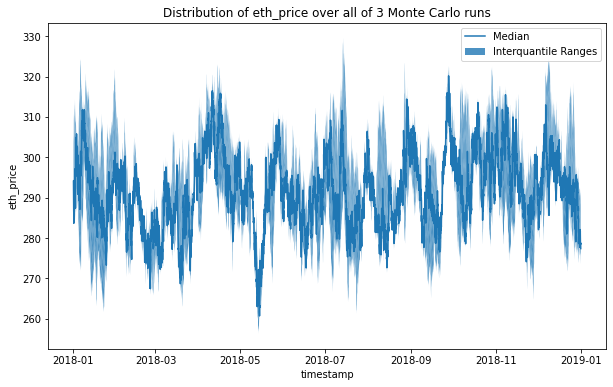

In [17]:
plot_fan_chart(df,'timestamp','timestamp', 'eth_price',lx=False,ly=False,density_hack=True)

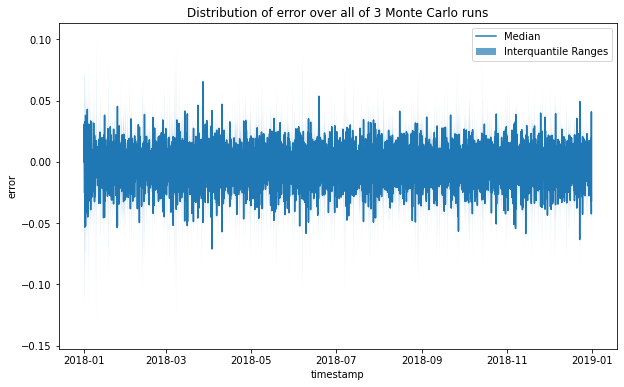

In [18]:
plot_fan_chart(df,'timestamp','timestamp', 'error',lx=False,ly=False,density_hack=True)

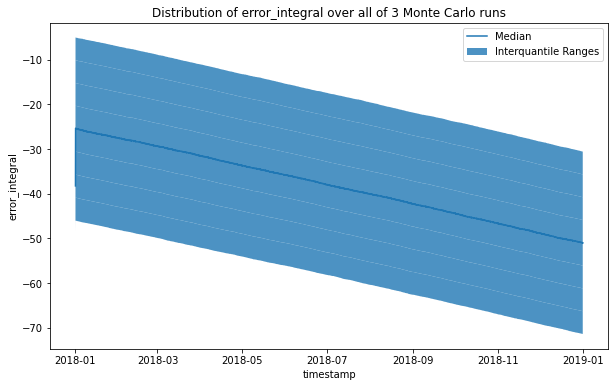

In [19]:
plot_fan_chart(df,'timestamp','timestamp', 'error_integral',lx=False,ly=False,density_hack=True)

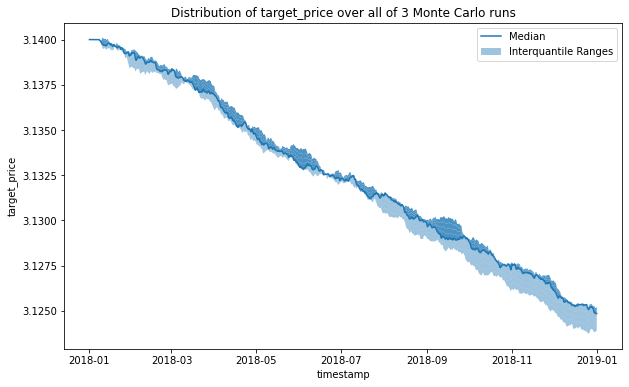

In [23]:
# Redemption Price in Rai
plot_fan_chart(df,'timestamp','timestamp', 'target_price',lx=False, ly=False, density_hack=True)

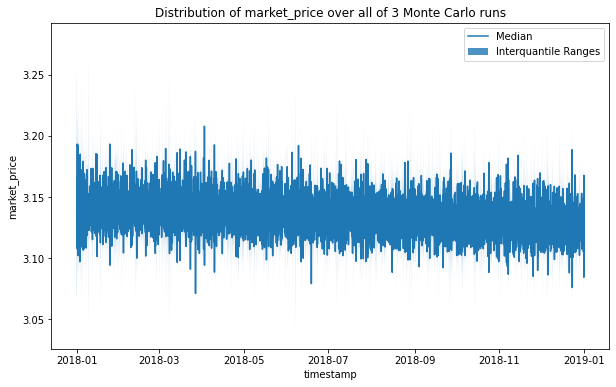

In [21]:
# Market Price in Rai
plot_fan_chart(df,'timestamp','timestamp', 'market_price',lx=False,ly=False,density_hack=True)

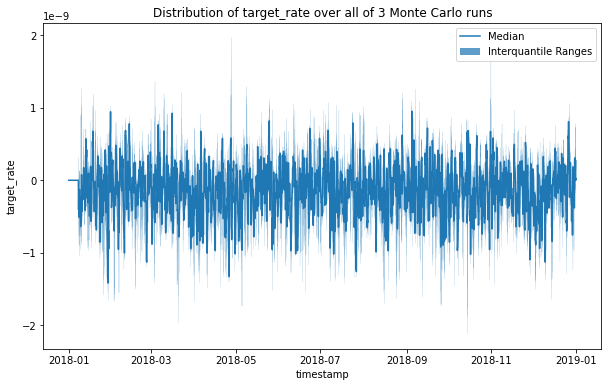

In [24]:
# Redemption Rate
plot_fan_chart(df,'timestamp','timestamp', 'target_rate',lx=False,ly=False, density_hack=True)

## Conclusion

System simulation appears to be as expected across a series of 5 monte carlo runs.